**WORK WITH TIME-SERIES DATA:**

Data preprocessing methodology:

- When working with time-series data such as Bitcoin prediction problem, it is recommended to set `shuffle=False` when splitting data into train-test. (This is because if `shuffle=True`, we may end up predicting past Bitcoin prices). <br>
For other prediction problems such as house prices or car prices, it is appropriate to set `shuffle=True` (because if `shuffle=False`, for example, the house price data is sorted by price, then there is a risk of falling into the case where all houses put into the test set have higher/lower values than the average and this will result in a poor model).

- This data is time series it's sequential, so we don't use Cross-Validation or any of the model ML techniques to evaluate error. TimeSeriesSplit, which is a specific type of cross-validation technique used for time series data. It's important to use time-series cross-validation when dealing with sequential data to avoid training on future data. TimeSeriesSplit splits the data into folds, so that the folds with data from the previous past will be used as the training set, and the future data will only be used as the test set. For example, if we split the data into 3 folds, each fold would consist of:
    - Fold 1: Data from January 2016 to December 2017 (training set) and data from January 2018 to December 2018 (test set).    
    - Fold 2: Data from January 2016 to December 2018 (training set) and data from January 2019 to December 2019 (test set).    
    - Fold 3: Data from January 2016 to December 2019 (training set) and data from January 2020 to December 2020 (test set). <br>

The code: `tscv = TimeSeriesSplit(n_splits=3)` will creat a time-series cross-validation object that splits the data into 3 folds in chronological order.

- It's convenient: to have data ORDERED IN INCREASING ORDER OF DATE(with Time-Series Data)

Dữ liệu được scale trước khi training và inverse transform trước khi đánh giá. ???


- **Thuật toán Linear Regression (Hồi quy tuyến tính)** - 1 cách dễ hiểu
  - **Định nghĩa đơn giản**:
    - Linear Regression là phương pháp dự đoán dựa trên mối quan hệ tuyến tính (mối quan hệ dạng đường thẳng) giữa các yếu tố.
    - Nếu có hai yếu tố mà khi một yếu tố thay đổi thì yếu tố kia cũng thay đổi, Linear Regression sẽ cố gắng vẽ một đường thẳng đi qua dữ liệu đó, từ đó giúp dự đoán giá trị tương lai.
  - **Ví dụ đơn giản**:
    - Giả sử các bạn học sinh để ý thấy rằng càng nhiều thời gian học tập, điểm số có xu hướng càng cao.
    - Linear Regression sẽ cố gắng vẽ một đường thẳng qua các điểm số này để thấy rằng nếu chúng ta dành nhiều thời gian học hơn, điểm số dự đoán sẽ tăng lên.


### **Lasso và Ridge Regression: Cách giải thích đơn giản**

#### **1. Lasso Regression:**
- **Định nghĩa đơn giản:**
  - Lasso Regression (Least Absolute Shrinkage and Selection Operator) là một phương pháp mở rộng của Linear Regression, giúp giảm thiểu việc mô hình bị quá khớp (overfitting).
  - Thay vì chỉ vẽ một đường thẳng qua dữ liệu, Lasso sẽ tìm cách **loại bỏ hoàn toàn các yếu tố ít quan trọng** bằng cách **đưa hệ số của chúng về 0**.

- **Ví dụ đơn giản:**
  - Giả sử chúng ta đang làm bài tập dự đoán điểm số, nhưng có quá nhiều yếu tố liên quan (thời gian học, chất lượng giáo viên, số lượng bài tập,...).
  - Lasso sẽ tự động loại bỏ những yếu tố ít quan trọng (ví dụ, "số lượng bài tập" có thể không ảnh hưởng đáng kể) để chỉ tập trung vào những yếu tố quan trọng nhất.

- **Cách hoạt động:**
  - Lasso thêm một hình phạt (penalty) vào phương trình dự đoán, và hình phạt này phụ thuộc vào tổng giá trị tuyệt đối của các hệ số.

---

#### **2. Ridge Regression:**
- **Định nghĩa đơn giản:**
  - Ridge Regression là một phương pháp khác để giảm overfitting, tương tự như Lasso, nhưng thay vì loại bỏ hoàn toàn các yếu tố ít quan trọng, nó **đẩy các hệ số này gần về 0** mà không đưa về 0 hẳn.

- **Ví dụ đơn giản:**
  - Nếu chúng ta dự đoán điểm số với nhiều yếu tố, Ridge sẽ không loại bỏ yếu tố nào hoàn toàn. Thay vào đó, nó giảm mức độ ảnh hưởng của những yếu tố ít quan trọng, để mô hình không phụ thuộc quá nhiều vào chúng.

- **Cách hoạt động:**
  - Ridge cũng thêm một hình phạt, nhưng hình phạt này phụ thuộc vào bình phương của các hệ số (thay vì giá trị tuyệt đối như Lasso).

---

### **So sánh Lasso và Ridge:**
| **Thuật toán** | **Loại bỏ yếu tố ít quan trọng** | **Tối ưu cho số lượng biến** | **Mức độ giảm overfitting** |
|----------------|-----------------------------------|------------------------------|-----------------------------|
| **Lasso**      | Hoàn toàn đưa hệ số về 0         | Tốt khi có nhiều biến dư thừa| Mạnh hơn (có thể loại bỏ biến)|
| **Ridge**      | Đưa hệ số về gần 0               | Tốt khi tất cả biến đều liên quan| Nhẹ nhàng hơn (giữ tất cả biến)|

---

#### **Ứng dụng vào dự đoán xác suất lũ lụt:**
- **Lasso:**
  - Nếu có nhiều yếu tố dư thừa (ít ảnh hưởng, ví dụ "chất lượng đất"), Lasso sẽ loại bỏ hoàn toàn những yếu tố này để tập trung vào những yếu tố quan trọng như "lượng mưa" hoặc "khả năng thoát nước".
- **Ridge:**
  - Giữ lại tất cả các yếu tố nhưng giảm bớt mức độ ảnh hưởng của các yếu tố ít quan trọng để đảm bảo mô hình không quá phụ thuộc vào chúng.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 


Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\FPT_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9971790690766426
MSE: 856940.5696772229
RMSE: 925.7108456085101
MAE: 596.7283463063841
MAPE%: 1.51%
Directional Accuracy (DA): 44.03%

EVALUATE METRICS ON THE TEST SET
R2: 0.9934631509430711
MSE: 4157463.950993835
RMSE: 2038.986010494882
MAE: 1487.3247367009901
MAPE%: 1.45%
Directional Accuracy (DA): 48.64%



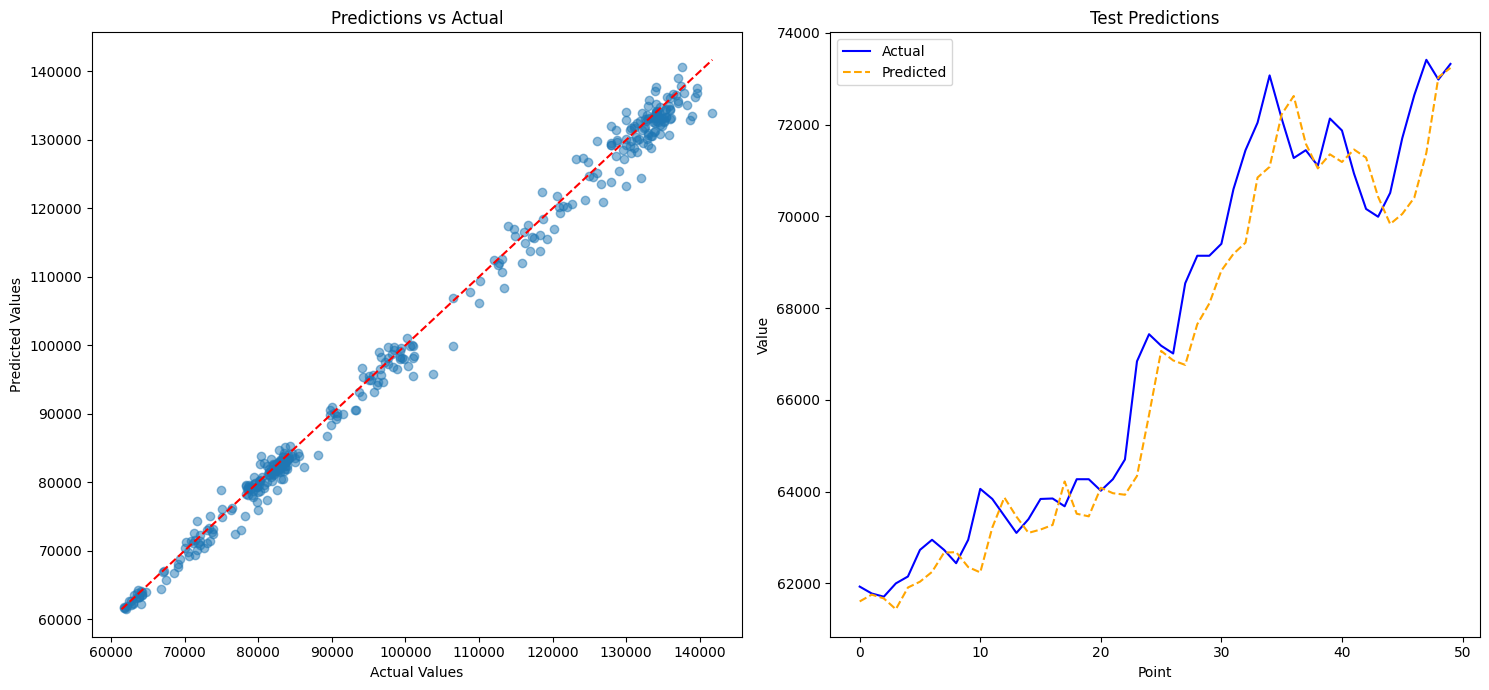

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\FPT_stock_data_TrainingModelsResults.txt


In [31]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


class StockPredictionModel:
    def __init__(self, data_path, output_dir=None, comparison_output_dir=None):
        """
        Initialize the class with the file path of the dataset.
        """
        self.data_path = data_path
        self.output_dir = output_dir
        self.comparison_output_dir = comparison_output_dir  # Thư mục lưu file CSV

        # Set the output path for .txt results
        if output_dir:
            # Lấy tên file từ data_path (chỉ lấy phần cuối cùng)
            base_filename = os.path.basename(data_path).replace(".csv", "_TrainingModelsResults.txt")
            self.output_path = os.path.join(output_dir, base_filename)
        else:
            self.output_path = data_path.replace(".csv", "_TrainingModelsResults.txt")

        # Initialize scalers
        self.scaler_X = MinMaxScaler(feature_range=(0, 1))
        self.scaler_y = MinMaxScaler(feature_range=(0, 1))
    def load_and_preprocess_data(self):
        """
        Load the dataset and preprocess the data.
        """
        # Load data
        self.data = pd.read_csv(self.data_path)
        self.data["close_tomor"] = self.data["close"].shift(-1)
        self.data = self.data.iloc[:-1]  # Remove last row
        self.data.drop("close", axis=1, inplace=True)

        # Define features and target
        X = self.data.drop(["close_tomor", "time"], axis=1)
        y = self.data["close_tomor"].values.reshape(-1, 1)

        # Scale features and target
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_scaled, test_size=0.25, random_state=42, shuffle=False
        )

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train, alpha=0.5):
        """
        Train a Ridge regression model with the given training data.
        """
        self.model = Ridge(alpha=alpha, solver="lsqr")
        self.model.fit(X_train, y_train)

    def directional_accuracy(self, y_true, y_pred):
        """
        Calculate the Directional Accuracy (DA).
        """
        return np.mean((np.sign(y_true[1:] - y_true[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])))

    def evaluate_model(self, y_train, y_pred_train, y_test, y_pred_test):
        """
        Evaluate the model performance using various metrics and append results to a file.
        """
        # Inverse transform predictions and actual values
        y_train_original = self.scaler_y.inverse_transform(y_train)
        y_pred_train_original = self.scaler_y.inverse_transform(y_pred_train.reshape(-1, 1))
        y_test_original = self.scaler_y.inverse_transform(y_test)
        y_pred_test_original = self.scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

        # Create a comparison DataFrame for the test set
        comparison_test_df = pd.DataFrame({
            'Actual': y_test_original.flatten(),
            'Predicted': y_pred_test_original.flatten()
        })

        # Define the output path for the comparison CSV
        base_filename = os.path.basename(self.data_path).replace(".csv", "_test_comparison.csv")
        if self.comparison_output_dir:
            comparison_output_path = os.path.join(
                self.comparison_output_dir,
                base_filename)
        else:
            comparison_output_path = self.output_path.replace("_TrainingModelsResults.txt", "_test_comparison.csv")

        # Ensure the directory exists
        os.makedirs(os.path.dirname(comparison_output_path), exist_ok=True)

        # Save comparison to CSV
        comparison_test_df.to_csv(comparison_output_path, index=False)

        # Print the location of the comparison file
        print(f"Comparison results saved to: {comparison_output_path}")


        # Metrics for train set
        r2_train = r2_score(y_train_original, y_pred_train_original)
        mse_train = mean_squared_error(y_train_original, y_pred_train_original)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train_original, y_pred_train_original)
        mape_train = mean_absolute_percentage_error(y_train_original, y_pred_train_original) * 100
        da_train = self.directional_accuracy(y_train_original, y_pred_train_original)

        # Metrics for test set
        r2_test = r2_score(y_test_original, y_pred_test_original)
        mse_test = mean_squared_error(y_test_original, y_pred_test_original)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test_original, y_pred_test_original)
        mape_test = mean_absolute_percentage_error(y_test_original, y_pred_test_original) * 100
        da_test = self.directional_accuracy(y_test_original, y_pred_test_original)

        # Print metrics
        print("EVALUATE METRICS ON THE TRAIN SET")
        print("R2:", r2_train)
        print("MSE:", mse_train)
        print("RMSE:", rmse_train)
        print("MAE:", mae_train)
        print("MAPE%:", f"{mape_train:.2f}%")
        print(f"Directional Accuracy (DA): {da_train * 100:.2f}%\n")
        
        print("EVALUATE METRICS ON THE TEST SET")
        print("R2:", r2_test)
        print("MSE:", mse_test)
        print("RMSE:", rmse_test)
        print("MAE:", mae_test)
        print("MAPE%:", f"{mape_test:.2f}%")
        print(f"Directional Accuracy (DA): {da_test * 100:.2f}%\n")

        # Append results to file
        with open(self.output_path, "a") as file:
            file.write(f"Model: Ridge Regression\n")
            file.write(f"File Path: {self.data_path}\n")
            file.write("TRAIN SET METRICS:\n")
            file.write(f"R2: {r2_train:.4f}\n")
            file.write(f"MSE: {mse_train:.4f}\n")
            file.write(f"RMSE: {rmse_train:.4f}\n")
            file.write(f"MAE: {mae_train:.4f}\n")
            file.write(f"MAPE%: {mape_train:.2f}%\n")
            file.write(f"Directional Accuracy (DA): {da_train * 100:.2f}%\n\n")

            file.write("TEST SET METRICS:\n")
            file.write(f"R2: {r2_test:.4f}\n")
            file.write(f"MSE: {mse_test:.4f}\n")
            file.write(f"RMSE: {rmse_test:.4f}\n")
            file.write(f"MAE: {mae_test:.4f}\n")
            file.write(f"MAPE%: {mape_test:.2f}%\n")
            file.write(f"Directional Accuracy (DA): {da_test * 100:.2f}%\n")
            file.write("=" * 50 + "\n")

    def plot_model(self, y_test, y_pred_test, num_samples=50):
        """
        Plot predictions vs actual values.
        """
        y_test_rescaled = self.scaler_y.inverse_transform(y_test)
        y_pred_rescaled = self.scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Scatter plot
        ax1.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.5)
        ax1.set_title("Predictions vs Actual")
        ax1.set_xlabel("Actual Values")
        ax1.set_ylabel("Predicted Values")
        
        # Thêm đường y=x
        min_val = min(y_test_rescaled.min(), y_pred_rescaled.min())
        max_val = max(y_test_rescaled.max(), y_pred_rescaled.max())
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        # Line plot
        x_points = range(num_samples)
        ax2.plot(x_points, y_test_rescaled[:num_samples], 'b-', label='Actual')
        ax2.plot(x_points, y_pred_rescaled[:num_samples], 'orange', linestyle='--', label='Predicted')
        
        ax2.set_title("Test Predictions")
        ax2.set_xlabel("Point")
        ax2.set_ylabel("Value")
        ax2.legend()
        
        plt.tight_layout()
        plt.show()

    def process(self):
        """
        Execute the full pipeline: load, preprocess, train, evaluate, and plot.
        """
        X_train, X_test, y_train, y_test = self.load_and_preprocess_data()
        self.train_model(X_train, y_train)
        y_pred_train = self.model.predict(X_train)
        y_pred_test = self.model.predict(X_test)
        self.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)
        self.plot_model(y_test, y_pred_test)
        print(f"Results have been saved to: {self.output_path}")


# Example usage for one file
data_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv"
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results"
comparison_output_dir  = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict"

model = StockPredictionModel(data_path, output_dir=output_dir, comparison_output_dir=comparison_output_dir)
model.process()


## Chạy 1 loạt file 

Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\CMG_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\CMG_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9914183764961461
MSE: 553490.7101419732
RMSE: 743.9695626448525
MAE: 505.7837124703233
MAPE%: 2.16%
Directional Accuracy (DA): 44.85%

EVALUATE METRICS ON THE TEST SET
R2: 0.9772631660850682
MSE: 2050224.0303277217
RMSE: 1431.8603389743434
MAE: 950.1557825613836
MAPE%: 1.94%
Directional Accuracy (DA): 47.55%



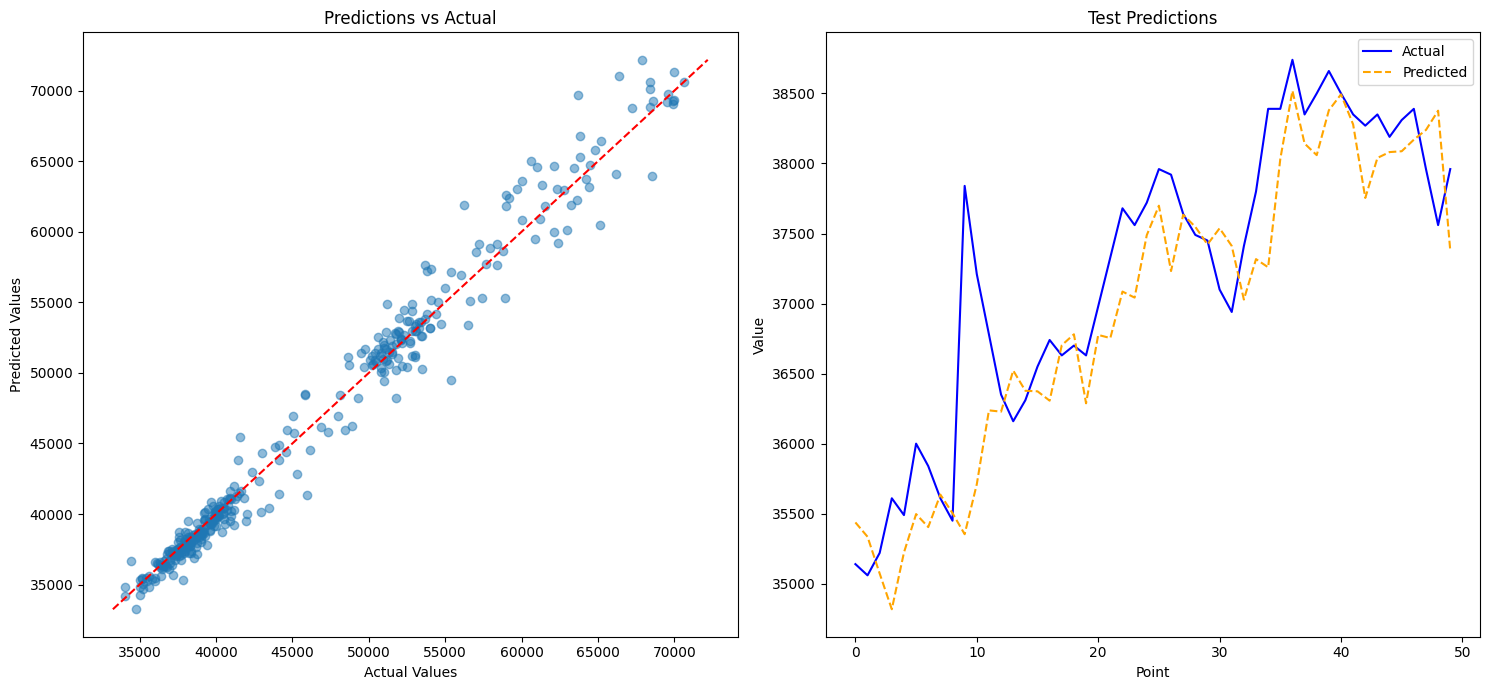

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\CMG_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\CMT_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\CMT_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.98646327874491
MSE: 481002.093272849
RMSE: 693.5431444927193
MAE: 411.32853753343767
MAPE%: 3.29%
Directional Accuracy (DA): 35.84%

EVALUATE METRICS ON THE TEST SET
R2: 0.954813955969043
MSE: 799747.8765529484
RMSE: 894.2862386020196
MAE: 533.7003794864428
MAPE%: 3.16%
Directional Accuracy (DA): 44.14%



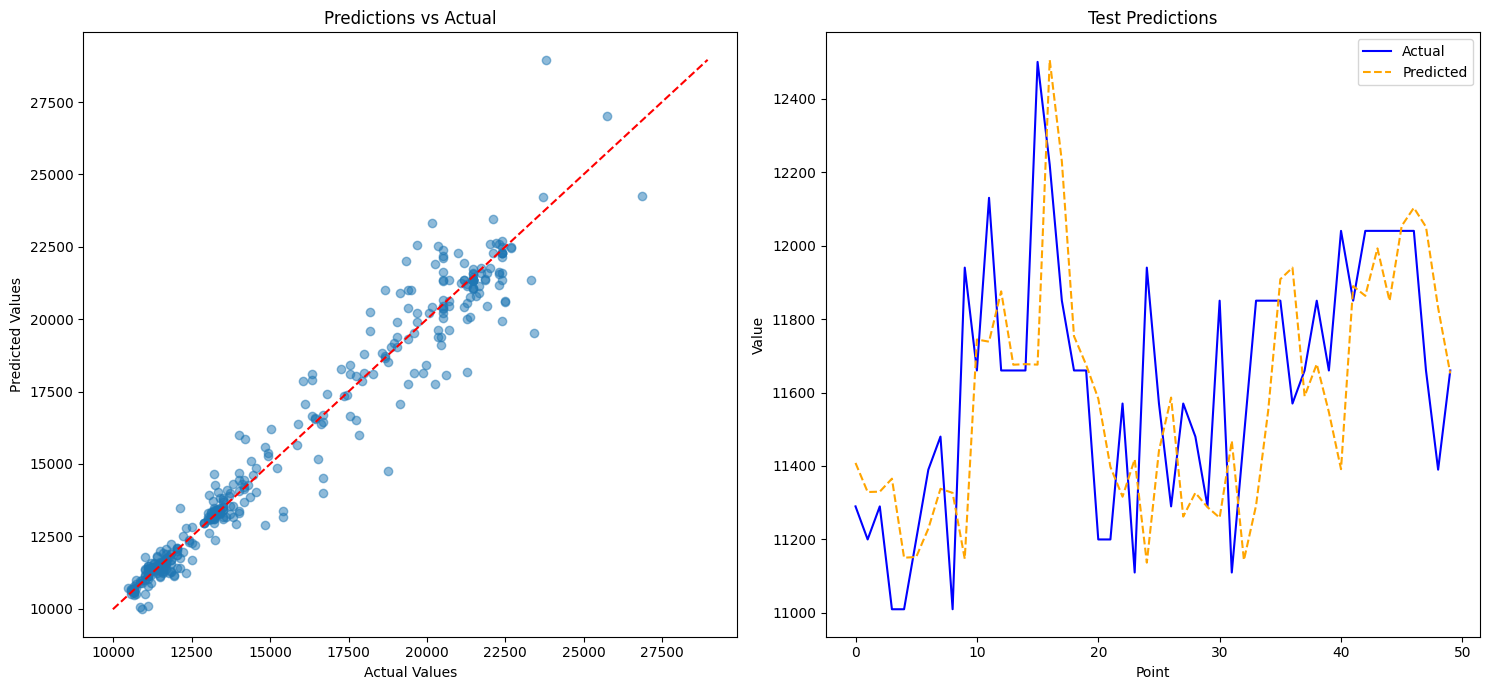

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\CMT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\DGW_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\DGW_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9950053653057538
MSE: 1657026.3374258426
RMSE: 1287.255350513581
MAE: 761.9504043144104
MAPE%: 3.14%
Directional Accuracy (DA): 47.02%

EVALUATE METRICS ON THE TEST SET
R2: 0.9338004691937053
MSE: 1456316.446503928
RMSE: 1206.7793694391398
MAE: 858.0777106124805
MAPE%: 2.02%
Directional Accuracy (DA): 45.38%



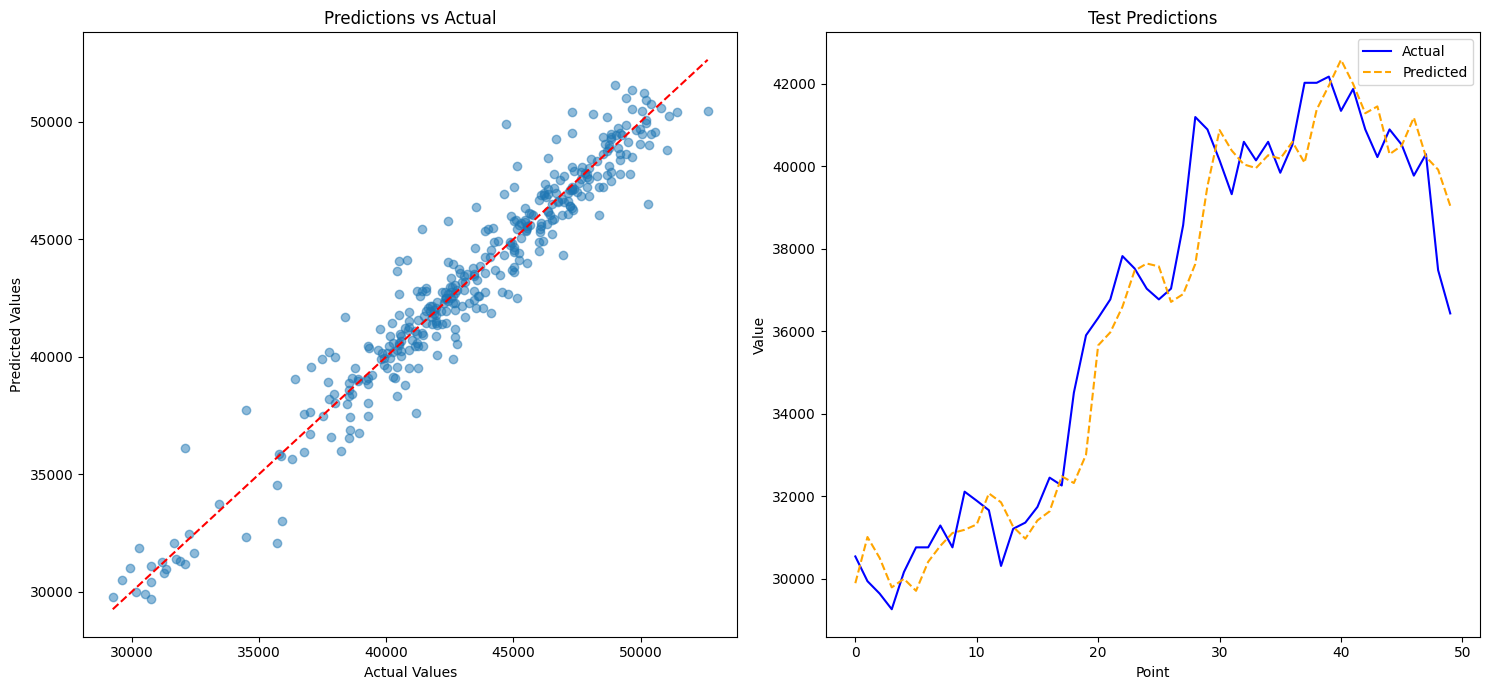

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\DGW_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\ELC_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\ELC_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9937881938031757
MSE: 111832.82545472351
RMSE: 334.41415259334275
MAE: 212.9129322127141
MAPE%: 2.78%
Directional Accuracy (DA): 43.85%

EVALUATE METRICS ON THE TEST SET
R2: 0.983758779437139
MSE: 403558.6942941317
RMSE: 635.262697074314
MAE: 488.17640596291943
MAPE%: 2.39%
Directional Accuracy (DA): 50.27%



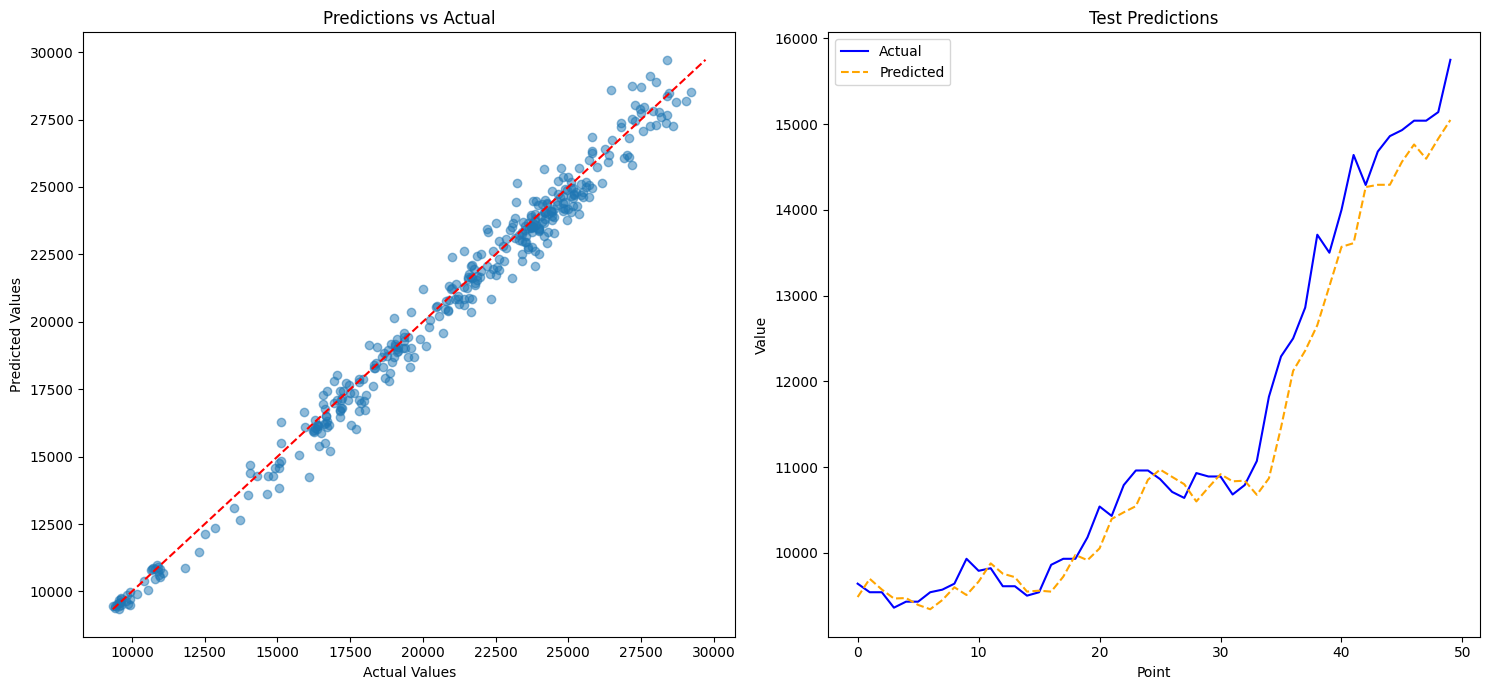

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\ELC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\FPT_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\FPT_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9971790690766426
MSE: 856940.5696772229
RMSE: 925.7108456085101
MAE: 596.7283463063841
MAPE%: 1.51%
Directional Accuracy (DA): 44.03%

EVALUATE METRICS ON THE TEST SET
R2: 0.9934631509430711
MSE: 4157463.950993835
RMSE: 2038.986010494882
MAE: 1487.3247367009901
MAPE%: 1.45%
Directional Accuracy (DA): 48.64%



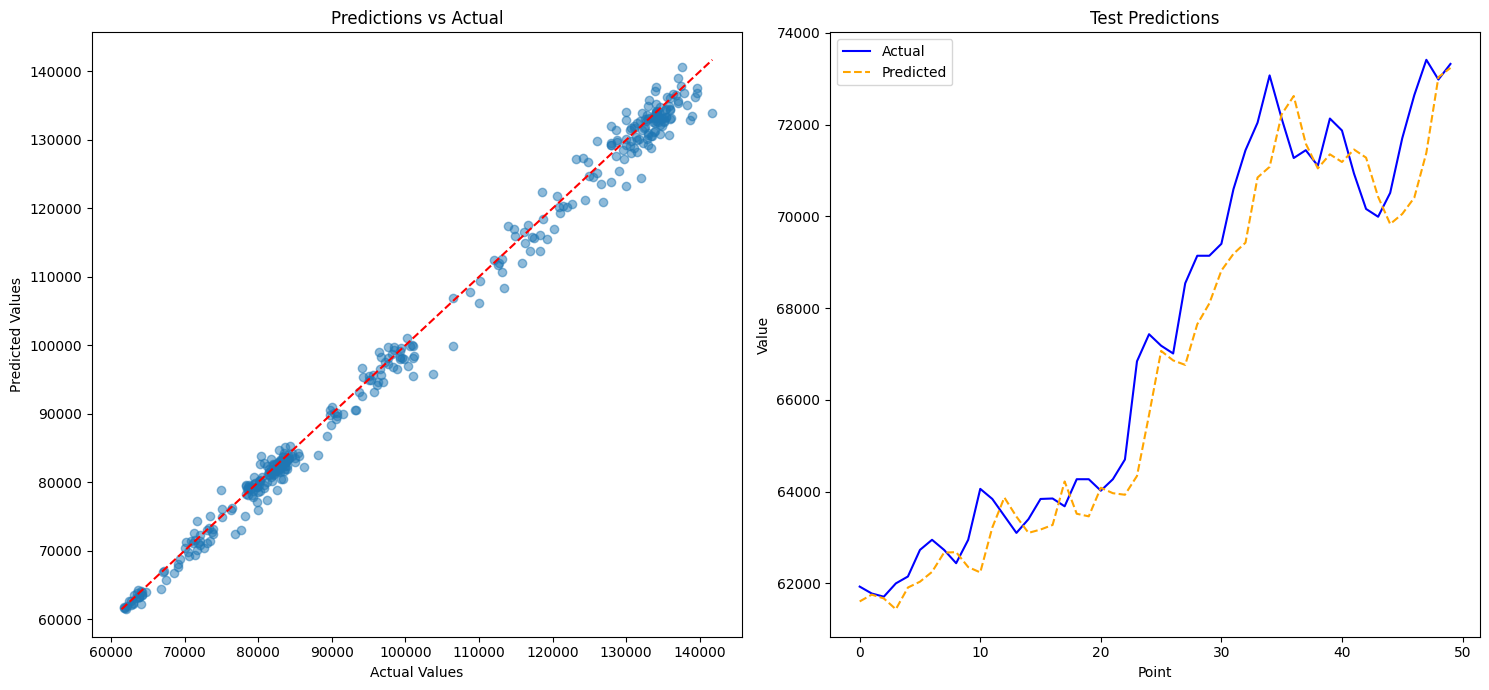

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\FPT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\SAM_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\SAM_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9871589014858895
MSE: 209841.50508558122
RMSE: 458.08460472447797
MAE: 260.39472802374064
MAPE%: 2.29%
Directional Accuracy (DA): 39.15%

EVALUATE METRICS ON THE TEST SET
R2: 0.8736840240598349
MSE: 29947.605079623085
RMSE: 173.05376355232232
MAE: 126.29038544401898
MAPE%: 1.84%
Directional Accuracy (DA): 45.65%



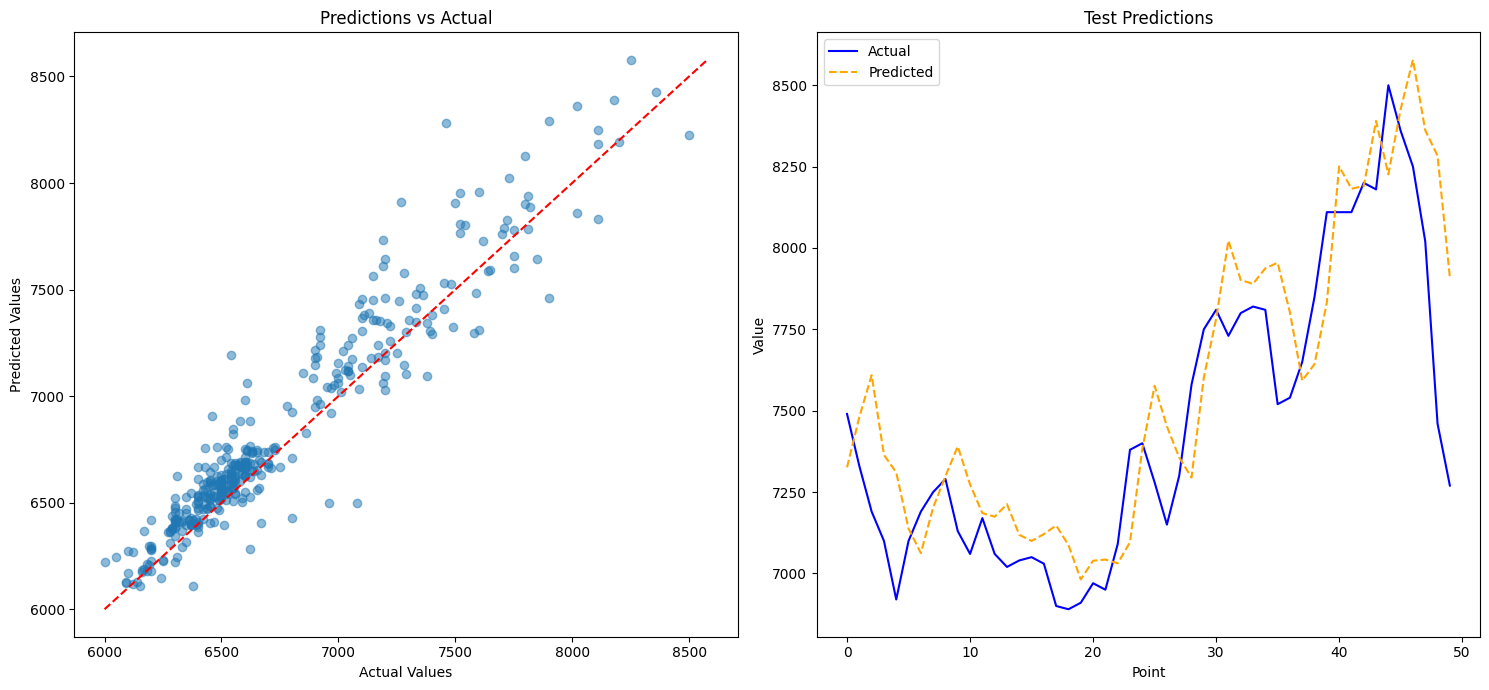

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\SAM_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\VGC_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\VGC_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9903024541682517
MSE: 1589769.8473041414
RMSE: 1260.8607565088785
MAE: 785.3615809651371
MAPE%: 2.51%
Directional Accuracy (DA): 41.82%

EVALUATE METRICS ON THE TEST SET
R2: 0.9396072265280199
MSE: 1537955.6552774203
RMSE: 1240.143401094172
MAE: 900.0500324764114
MAPE%: 1.90%
Directional Accuracy (DA): 44.96%



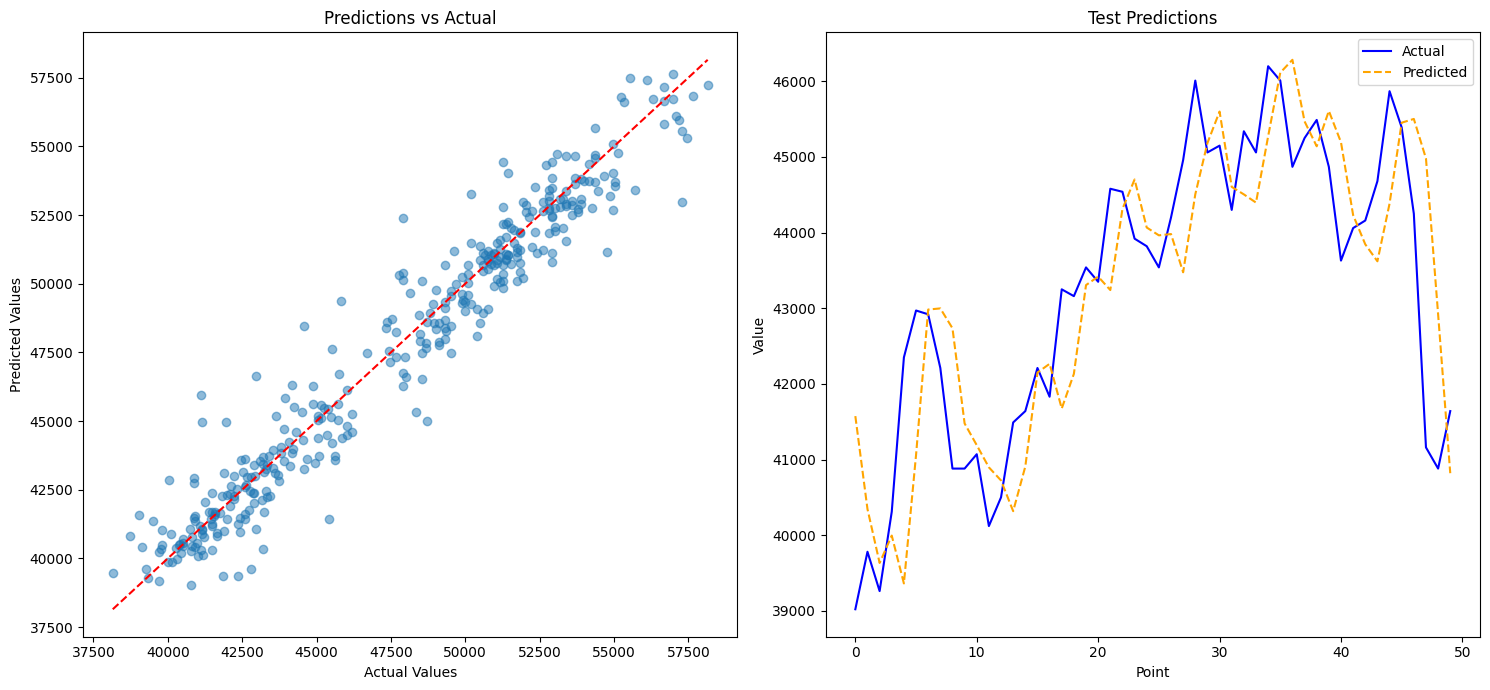

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VGC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\VGI_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\VGI_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9652596739372764
MSE: 1255189.4661145646
RMSE: 1120.352384794429
MAE: 786.0204665498256
MAPE%: 2.80%
Directional Accuracy (DA): 42.86%

EVALUATE METRICS ON THE TEST SET
R2: 0.9821625666581253
MSE: 12929466.559125507
RMSE: 3595.756743597307
MAE: 2317.08044281999
MAPE%: 3.84%
Directional Accuracy (DA): 46.20%



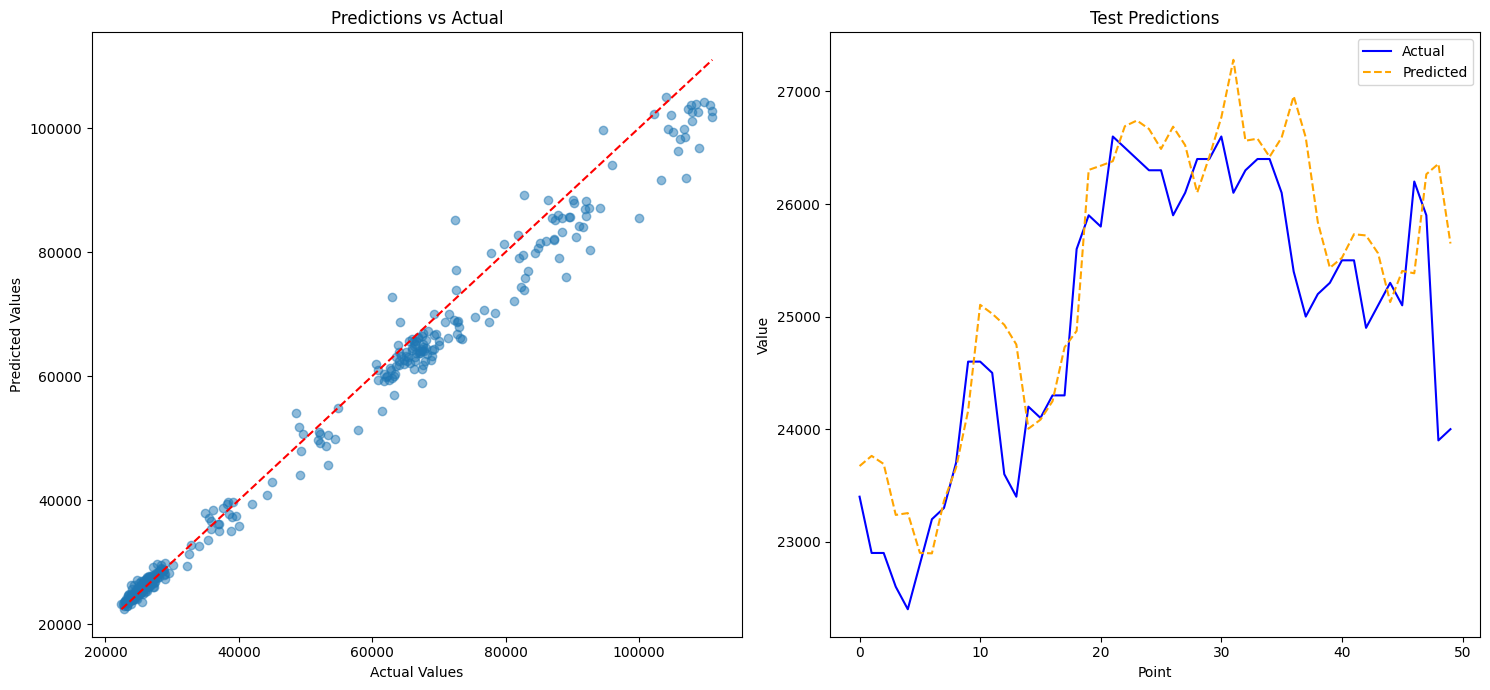

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VGI_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\VTL_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\VTL_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9887901148342169
MSE: 422291.67898123007
RMSE: 649.8397333044742
MAE: 287.9904313783146
MAPE%: 1.77%
Directional Accuracy (DA): 65.78%

EVALUATE METRICS ON THE TEST SET
R2: 0.9815295281779582
MSE: 247805.38436805786
RMSE: 497.8005467735626
MAE: 223.73334319687783
MAPE%: 2.98%
Directional Accuracy (DA): 71.79%



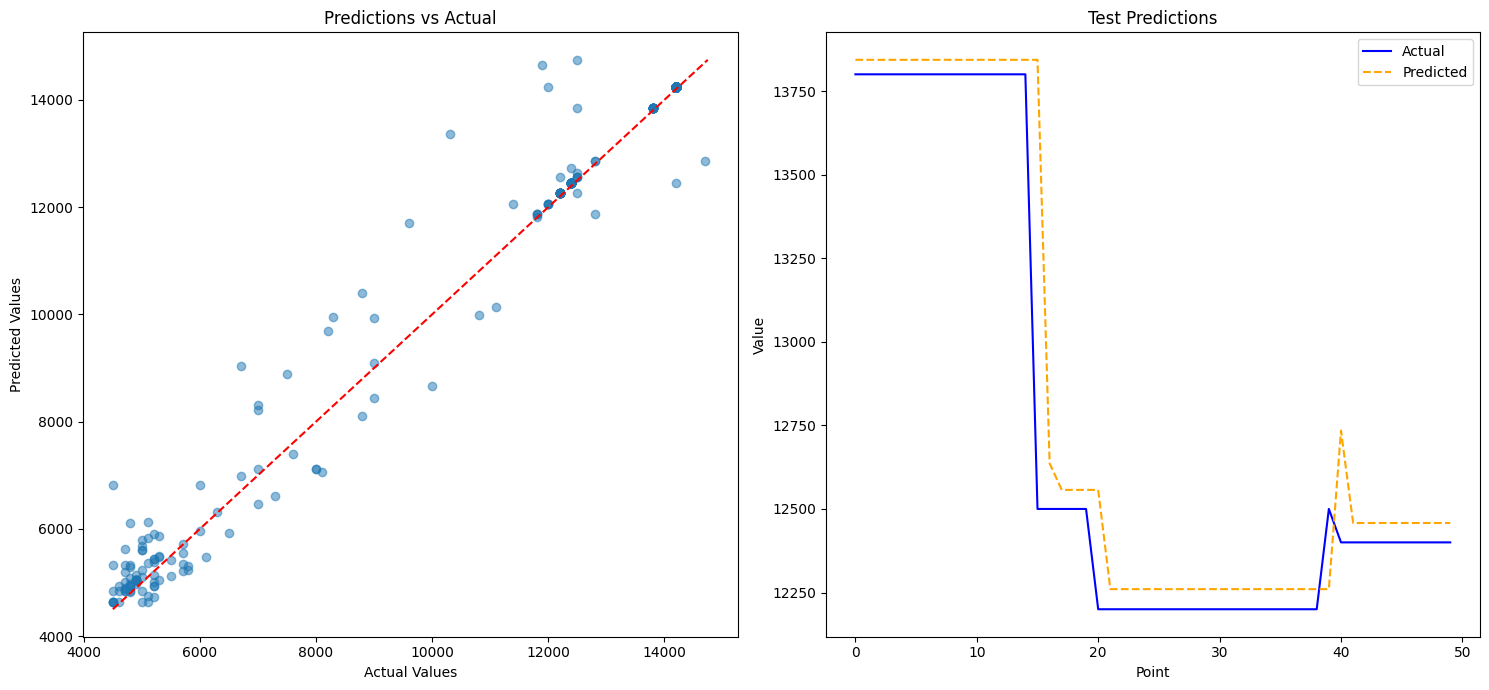

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VTL_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024\VTP_stock_data.csv

Comparison results saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict\VTP_stock_data_test_comparison.csv
EVALUATE METRICS ON THE TRAIN SET
R2: 0.9885253753032593
MSE: 1835977.957711937
RMSE: 1354.9826411109248
MAE: 918.0128339828339
MAPE%: 1.89%
Directional Accuracy (DA): 48.36%

EVALUATE METRICS ON THE TEST SET
R2: 0.9861171722984634
MSE: 6290312.294586038
RMSE: 2508.0495000270703
MAE: 1635.6758666736068
MAPE%: 2.34%
Directional Accuracy (DA): 44.69%



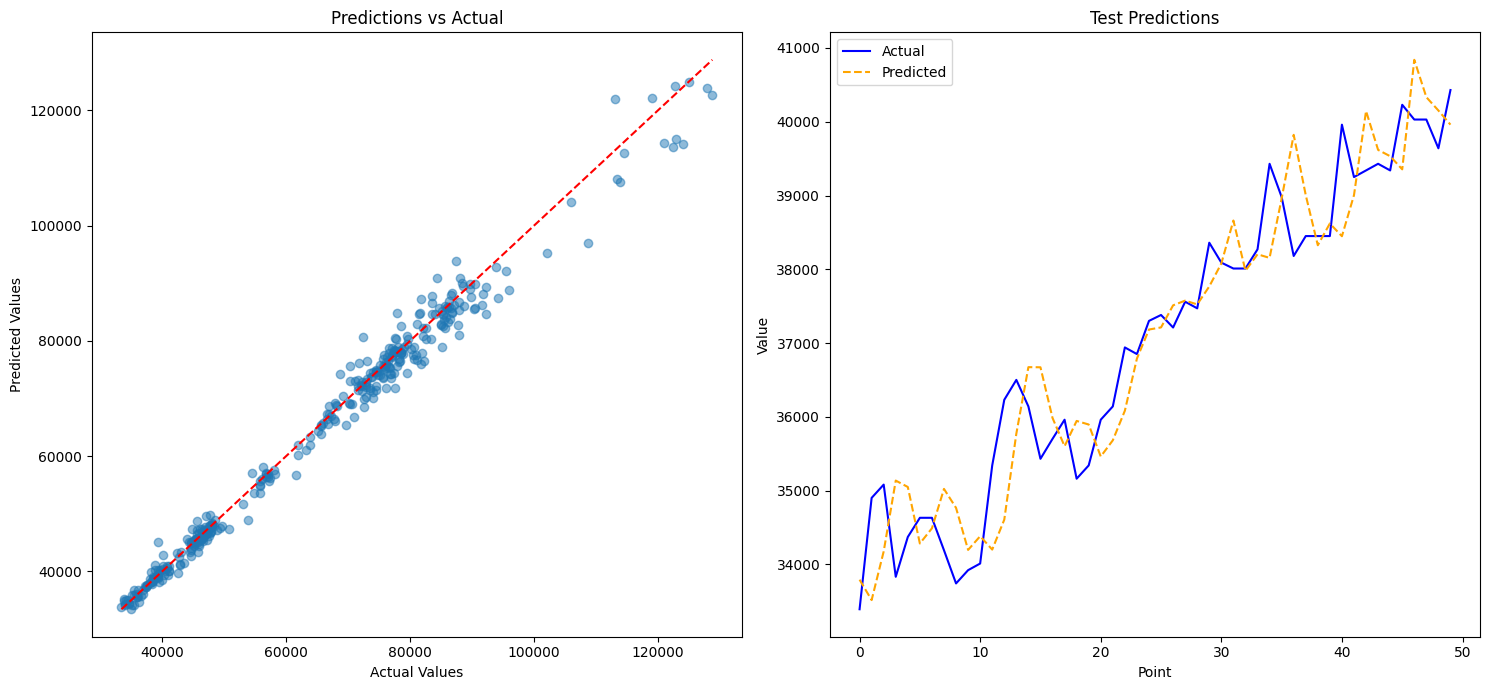

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\VTP_stock_data_TrainingModelsResults.txt


In [32]:
import os

data_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv"
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results"
comparison_output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/compare_RealVsPredict"

# Tạo thư mục lưu kết quả nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)
os.makedirs(comparison_output_dir, exist_ok=True)

# Lấy danh sách tất cả các file CSV trong thư mục chứa data_path
folder_path = os.path.dirname(data_path)
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Chạy model process cho từng file
for file_path in file_paths:
    print(f"Processing file: {file_path}")
    print()
    
    # Truyền thêm comparison_output_dir để lưu kết quả CSV
    model = StockPredictionModel(file_path, output_dir=output_dir, comparison_output_dir=comparison_output_dir)
    
    # Đảm bảo thư mục tồn tại trước khi tạo file
    os.makedirs(os.path.dirname(model.output_path), exist_ok=True)
    
    # Tạo file nếu chưa tồn tại
    if not os.path.exists(model.output_path):
        with open(model.output_path, "w") as f:
            f.write("")  # Tạo file rỗng
    
    model.process()
    print("=" * 50)  # Ngăn cách giữa các file